## Implementing K- Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

#importing train_test_split
from sklearn.model_selection import train_test_split

### Importing the Diabetes dataset

In [2]:
# Import the dataset from csv (Sheet 0 = Non Responders, Sheet 1 = Responders)
diabetes_df = pd.read_csv("diabetes.csv")

In [8]:
diabetes_df.head()

# Outcome: 1 -> Person has Diabetes and 0 -> Person doesn't have diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Examine Shape of Dataset

In [9]:
diabetes_df.shape

(768, 9)

#### Examine Class Distribution

In [10]:
diabetes_df.Outcome.value_counts() / len(diabetes_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

#### Creating seperate arrays for Independent variables and Dependent Variables

In [11]:
# Create arrays to store our features and target variables

X = diabetes_df.drop('Outcome', axis=1).values # X has all the columns except "Outcomes"
Y = diabetes_df['Outcome'].values              # Y has the column "Outcomes"

### Scaling the Data

#### Apply Standard Scaling

In [12]:
# Apply Standard Scaler to our X dataset, to bring all the values on same scale(-1,1)

import sklearn.preprocessing as preproc

X_scaled = preproc.StandardScaler().fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Train/Test Split

#### Split our data into a train and test set

In [24]:
# Apply Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42,stratify=Y)

# stratify=Y helping balance the dataset

### Import K-NN Classifier

#### Let's apply different values of K to evaluate which value should give us the best prediction performance

###### We'll use 50 different values of K (1-50)

In [17]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create K values (1-10) and Create arrays to store train/test performance accuracy
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN Model
    knn.fit(X_train, Y_train)
    
    #Evaluate training performance
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Evaluate testing performance
    test_accuracy[i] = knn.score(X_test, Y_test)


### Visualize the Train/Test Report

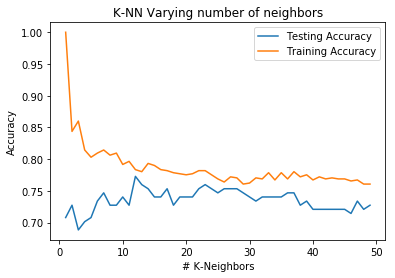

In [18]:
# Visualize Train/Test Performance

k = np.arange(1,50)
plt.title('K-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Apply GridSearchCV

It's hard to visually see which value of K is best for our preiction accuracy.

We'll apply GridSearch CV where:

 --For each value of K, we will apply 5-Fold Cross Validation to it

Specifically:

1) Try different values of K 

2) Train/Fit them all seperately

3) Evaluate each of their performance

4) Select the best score

In [19]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_scaled, Y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Examine the best score

In [22]:
knn_cv.best_score_

0.76692708333333337

### Examine the Best K value

In [23]:
knn_cv.best_params_

{'n_neighbors': 17}